# Chapter 002

Review of Another Core Module - Matplotlib

Hands-On Data Preprocessing in Python

## Drawing the main plots in Matplotlib

Drawing visuals with Matplotlib is easy. All you need is the right input and a correct understanding of the data. The main five visuals that we use in Matplotlib to draw are:
1. Histograms
2. Boxplots
3. Bar charts
4. Line plots
5. Scatterplots

### Summarizing numerical attributes using histograms or boxplots

1. First, you want to use the plt alias, as everyone else uses that.
2. Second, you want to import matplotlib.pyplot instaed of just matplotlib, as everything we will need from matplotlib is under .pyplot.

All you need to so is input the data you want to be plotted into plt.hist(). The last line of code, plt.show(), is what I always add to force Jupyternotebook to only show the plot I want.

In [1]:
import pandas as pd
import numpy as np

adult_df = pd.read_csv("../data/adult/adult.csv")

In [2]:
import matplotlib.pyplot as plt

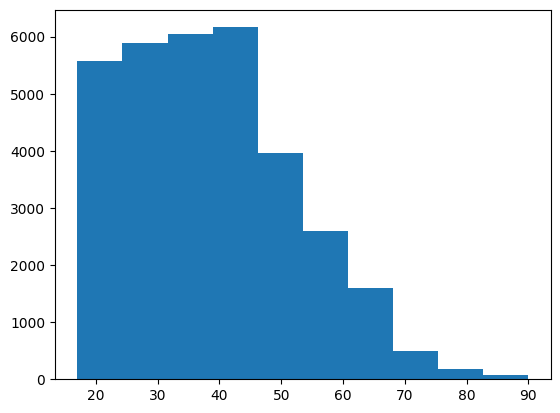

In [3]:
plt.hist(adult_df.age)
plt.show()

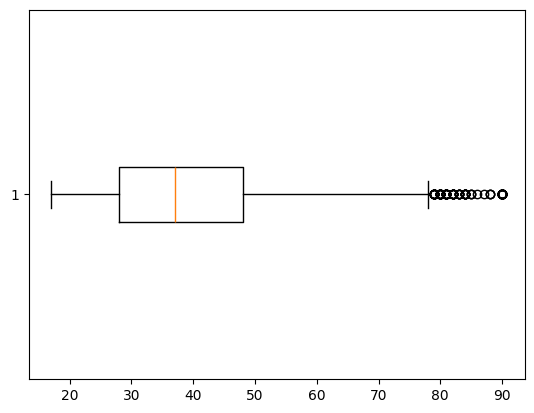

In [4]:
plt.boxplot(adult_df.age, vert=False)
plt.show()

### Observing trends in the data using a line plot

A line plot, not exclusively, but very often, is applied to time series data to show trens. A great example of time series data is stock prices.

In [5]:
amz_df = pd.read_csv("../data/amazon_stock/amazon_stock.csv")
apl_df = pd.read_csv("../data/apple_stock/apple_stock.csv")

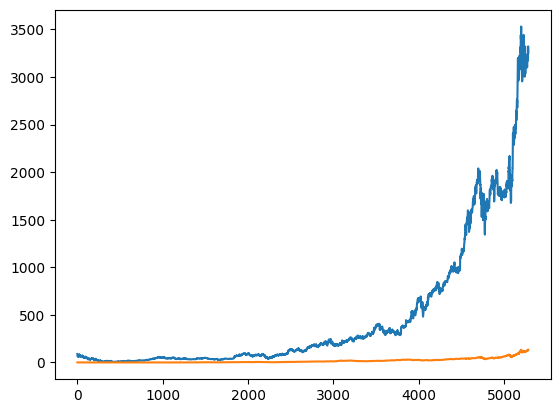

In [6]:
plt.plot(amz_df.Close)
plt.plot(apl_df.Close)
plt.show()

### Relatin two numerical attributes using a scatterplot

Scatterplots is a grat tool to examining the relationship between two numerical attributes.

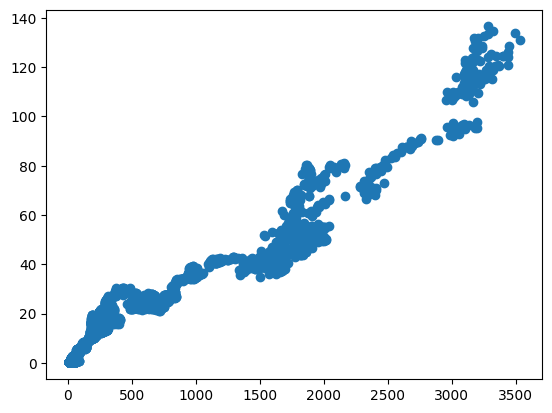

In [7]:
plt.scatter(amz_df.Close, apl_df.Close)
plt.show()

## Modifiying the visuals

Some visuals of Matplotlib: xticks, yticks, xlabel, ylabel, grids, lineplot, markers, legend, title.

### Adding a title to visuals and labels to the axis

To modify any part of Matplotlib visual, you need to execute a function that can do the modifying trick. To add a title to visual, you need to use plt.title() after a visual is executed.

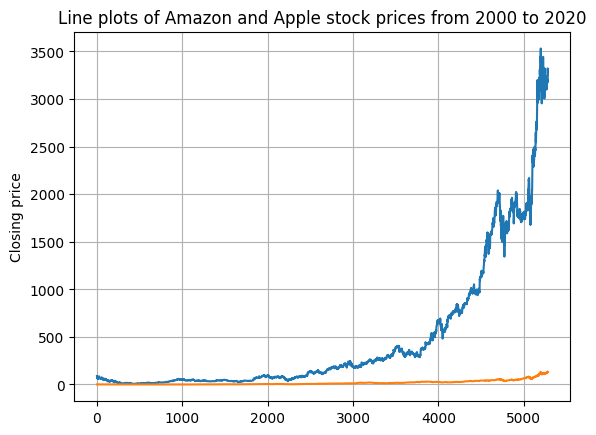

In [8]:
plt.plot(amz_df.Close)
plt.plot(apl_df.Close)
plt.title("Line plots of Amazon and Apple stock prices from 2000 to 2020")
plt.ylabel("Closing price")
plt.grid()
plt.show()

### Adding legends

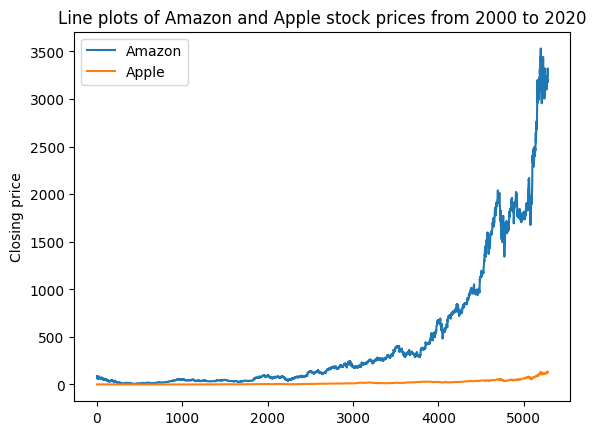

In [9]:
plt.plot(amz_df.Close, label='Amazon')
plt.plot(apl_df.Close, label='Apple')
plt.title("Line plots of Amazon and Apple stock prices from 2000 to 2020")
plt.ylabel("Closing price")
plt.legend()
plt.show()

### Modifing ticks

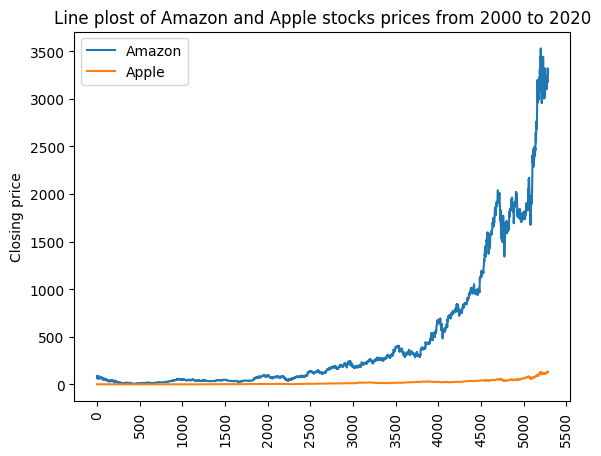

In [10]:
plt.plot(amz_df.Close, label='Amazon')
plt.plot(apl_df.Close, label='Apple')
plt.title('Line plost of Amazon and Apple stocks prices from 2000 to 2020')
plt.ylabel('Closing price')
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500], rotation=90)
plt.legend()
plt.show()

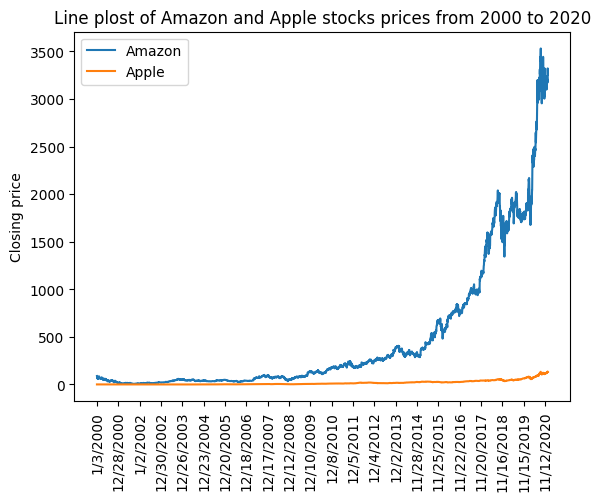

In [11]:
plt.plot(amz_df.Close, label='Amazon')
plt.plot(apl_df.Close, label='Apple')
plt.title('Line plost of Amazon and Apple stocks prices from 2000 to 2020')
plt.ylabel('Closing price')
plt.legend()
plt.xticks(
    ticks=np.arange(0,len(amz_df),250),
    labels=amz_df.Date[0:len(amz_df):250], 
    rotation=90,
    )
plt.show()

### Modifying markers

The only visuals that we presented here that use markers are scatterplots.

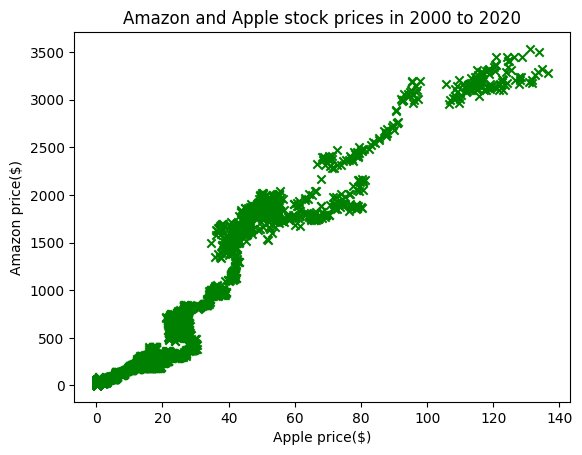

In [12]:
plt.scatter(apl_df.Close, amz_df.Close, marker='x', color='green')
plt.title('Amazon and Apple stock prices in 2000 to 2020')
plt.xlabel('Apple price($)')
plt.ylabel('Amazon price($)')
plt.show()

## Subplots

To draw a subplot, you first need to plan and decide the number of visuals you intend t have and their matrix-like organization.

1. The logic of Matplotlib subplots is that you use a line of code to announce you are about to start giving the code for each specific visual. The plt.sub-plot(2,1,1) line says that you want to have a subplot with two rows and one column.
2. Once you are done with the first visual, you run another plt.subplot(), but this time you announce your intention to star another visual. For instance, by running plt.subplot(2,1,2), you are announcing that you are done with the first visual, and you are about to start introducing the second visual.

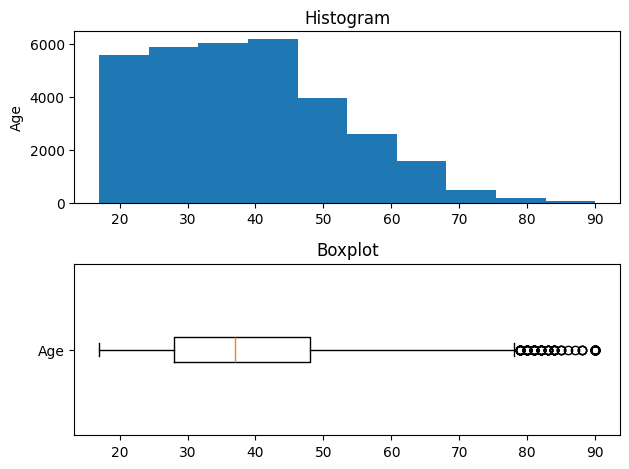

In [13]:
plt.subplot(2,1,1)
plt.hist(adult_df.age)
plt.title('Histogram')
plt.ylabel('Age')

plt.subplot(2,1,2)
plt.boxplot(adult_df.age, vert=False)
plt.title('Boxplot')
plt.yticks([1], ['Age'])

plt.tight_layout()
plt.show()

## Resizing visuals and saving them

Before adjust the resolution and saving the visuals, you might want to resize the visual.

### Resizing

To adjust the visual size, the easiest way is to run plt.figure(figsize=(6,4)) before starting to request any visuals.

### Saving

All you need to use to save and adjust the resolution fo the output figures is the plt.savefig() function. This function takes the name of the file you would like to create for saving the visual and also its resolution in terms of dots per inch (DPI).The higher the DPI value of a figure, the higher its resolution. Running plt.savefig('visual.png', dpi=600) save the visual in a file named visual.png in your computer.

## Example of Matplotlib assisting data preprocessing

A great way to get to know a new dataset is to visualize its columns. The numerical columns are best visualized using either histograms or boxplots. The combination of the two is the best, specially when the boxplot is drawn vertically.

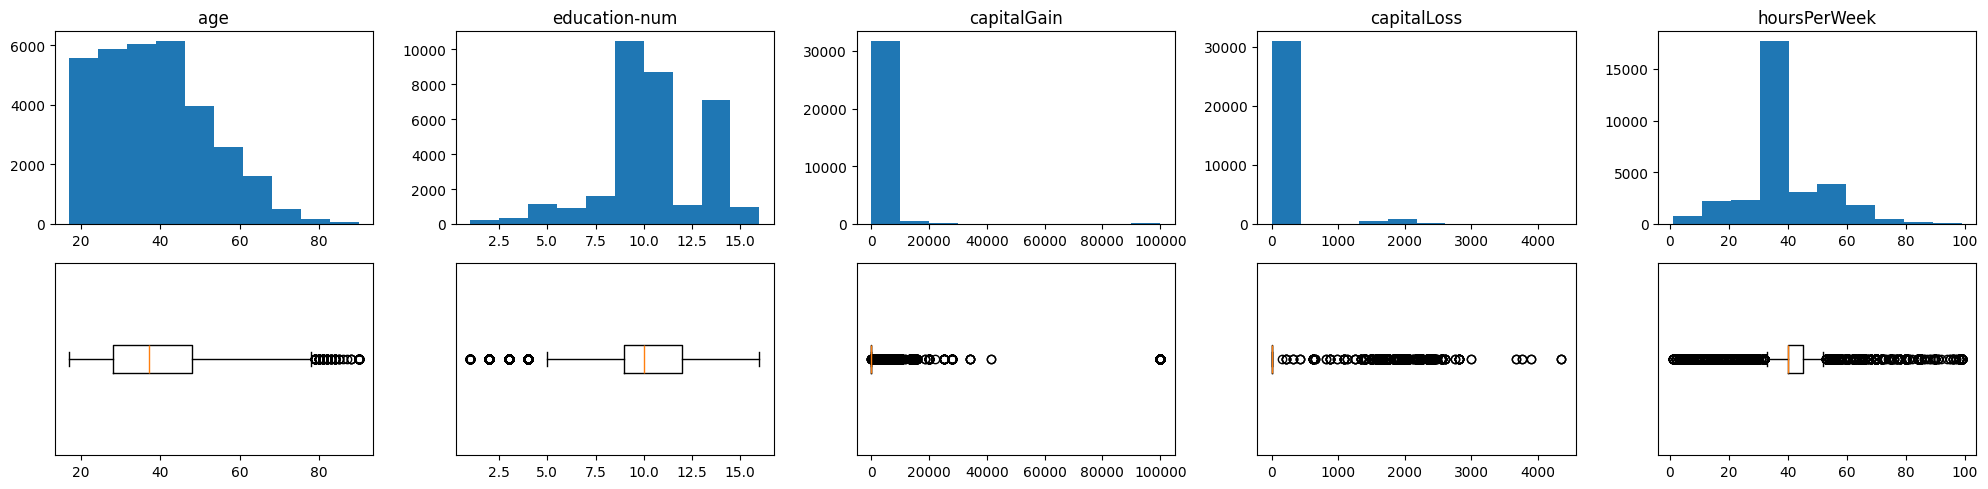

In [14]:
numerical_columns = ['age', 'education-num', 'capitalGain', 'capitalLoss', 'hoursPerWeek']

plt.figure(figsize=(20, 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 5, i+1)
    plt.hist(adult_df[col])
    plt.title(col)
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 5, i+6)
    plt.boxplot(adult_df[col], vert=False)
    plt.yticks([])
plt.tight_layout()
plt.savefig('ColumnsVisualization.png', dpi=900)

# Extras

Extras are information from another chapters but also involved in visualization tools.

<Axes: xlabel='age', ylabel='capitalGain'>

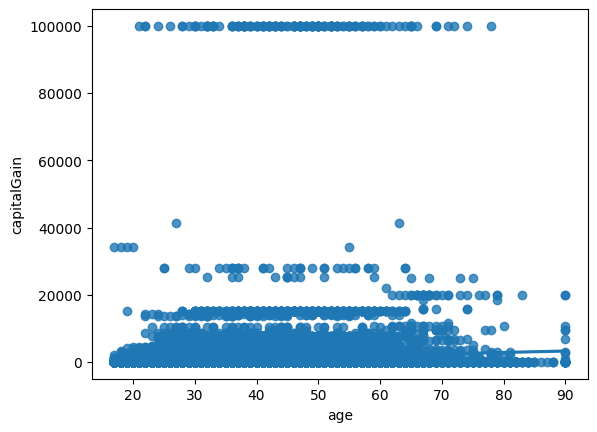

In [17]:
import seaborn as sns

sns.regplot(x="age", y="capitalGain", data=adult_df)